## PROGRAM MODEL UAS SOAL MODEL KLASIFIKASI
Nama : Atanasius Pradiptha Sampurno<br>
Kelas : TK-45-02<br>
NIM : 1103213036

### Tahap 1 :  Pengumpulan, Pembersihan, Preprocessing, dan Augmentasi Data

In [1]:
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Path ke folder dataset
dataset_dir = r"C:\Users\Atanasius\OneDrive\Documents\A - KULIAH\A - SEMESTER 8\MACHINE LEARNING\Weekly_Task\Machine-Learning\UAS\Dataset"

# Preprocessing dan augmentasi dasar
transform_train = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])

transform_val_test = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

# Load dataset
train_dataset = datasets.ImageFolder(os.path.join(dataset_dir, 'train'), transform=transform_train)
val_dataset = datasets.ImageFolder(os.path.join(dataset_dir, 'val'), transform=transform_val_test)
test_dataset = datasets.ImageFolder(os.path.join(dataset_dir, 'test'), transform=transform_val_test)

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Cek jumlah kelas
print("Jumlah kelas:", len(train_dataset.classes))
print("Daftar label:", train_dataset.classes)


Jumlah kelas: 31
Daftar label: ['Bangus', 'Big Head Carp', 'Black Spotted Barb', 'Catfish', 'Climbing Perch', 'Fourfinger Threadfin', 'Freshwater Eel', 'Glass Perchlet', 'Goby', 'Gold Fish', 'Gourami', 'Grass Carp', 'Green Spotted Puffer', 'Indian Carp', 'Indo-Pacific Tarpon', 'Jaguar Gapote', 'Janitor Fish', 'Knifefish', 'Long-Snouted Pipefish', 'Mosquito Fish', 'Mudfish', 'Mullet', 'Pangasius', 'Perch', 'Scat Fish', 'Silver Barb', 'Silver Carp', 'Silver Perch', 'Snakehead', 'Tenpounder', 'Tilapia']


### Tahap 2 : Melihat Mapping Label ke Index

In [2]:
# Mapping label (nama folder) ke index
label_to_index = train_dataset.class_to_idx
index_to_label = {v: k for k, v in label_to_index.items()}

print("Label ke Index:")
for label, idx in label_to_index.items():
    print(f"{label:25s} -> {idx}")


Label ke Index:
Bangus                    -> 0
Big Head Carp             -> 1
Black Spotted Barb        -> 2
Catfish                   -> 3
Climbing Perch            -> 4
Fourfinger Threadfin      -> 5
Freshwater Eel            -> 6
Glass Perchlet            -> 7
Goby                      -> 8
Gold Fish                 -> 9
Gourami                   -> 10
Grass Carp                -> 11
Green Spotted Puffer      -> 12
Indian Carp               -> 13
Indo-Pacific Tarpon       -> 14
Jaguar Gapote             -> 15
Janitor Fish              -> 16
Knifefish                 -> 17
Long-Snouted Pipefish     -> 18
Mosquito Fish             -> 19
Mudfish                   -> 20
Mullet                    -> 21
Pangasius                 -> 22
Perch                     -> 23
Scat Fish                 -> 24
Silver Barb               -> 25
Silver Carp               -> 26
Silver Perch              -> 27
Snakehead                 -> 28
Tenpounder                -> 29
Tilapia                   -> 30


### Tahap 3 : Lihat Distribusi Label (Transformasi Data Analitik)

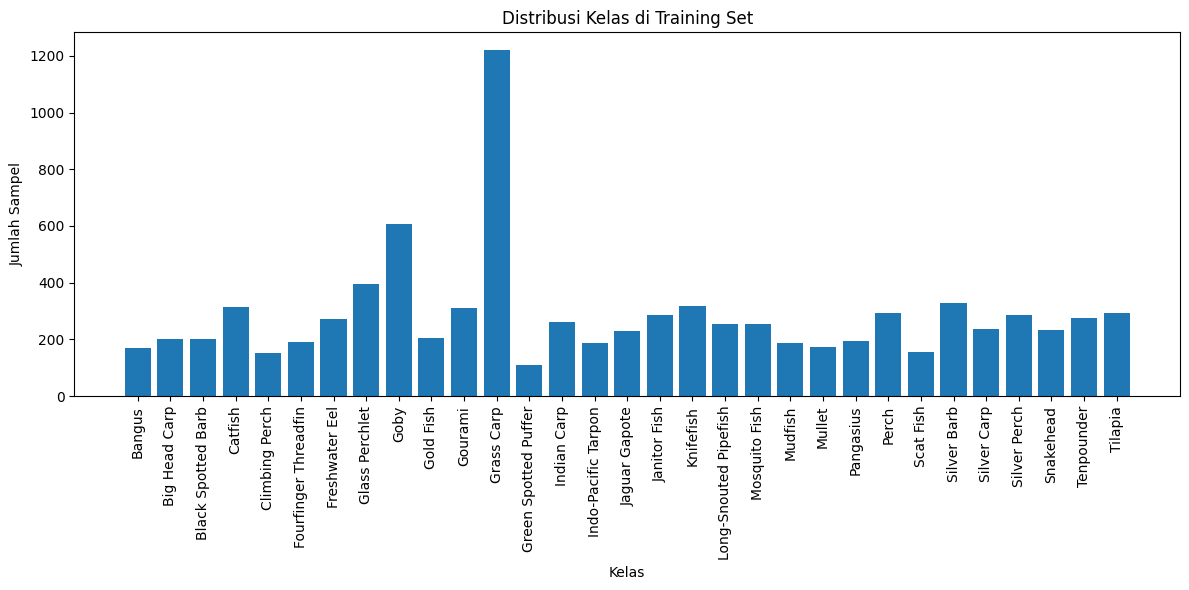

In [3]:
from collections import Counter
import matplotlib.pyplot as plt

# Ambil semua label dari dataset
all_labels = [label for _, label in train_dataset]

# Hitung distribusi kelas
label_counts = Counter(all_labels)

# Tampilkan dalam bentuk bar chart
plt.figure(figsize=(12, 6))
plt.bar([index_to_label[i] for i in label_counts.keys()], label_counts.values())
plt.xticks(rotation=90)
plt.title("Distribusi Kelas di Training Set")
plt.xlabel("Kelas")
plt.ylabel("Jumlah Sampel")
plt.tight_layout()
plt.show()


### Tahap 4 : One-Hot Encoding Label Secara Manual

In [4]:
import torch
import torch.nn.functional as F

# Contoh: ubah label 4 (misalnya "Goby") menjadi one-hot vektor
label_index = 4
num_classes = len(train_dataset.classes)
one_hot = F.one_hot(torch.tensor(label_index), num_classes=num_classes)

print("One-hot encoding dari label index 4:", one_hot)


One-hot encoding dari label index 4: tensor([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0])


### Tahap 5 : Cek Ulang Ukuran dan Tipe Data

In [5]:
sample_img, sample_label = train_dataset[0]
print("Shape gambar:", sample_img.shape)
print("Tipe gambar:", type(sample_img))
print("Label index:", sample_label)
print("Label name :", index_to_label[sample_label])



Shape gambar: torch.Size([3, 128, 128])
Tipe gambar: <class 'torch.Tensor'>
Label index: 0
Label name : Bangus


### Penjelasan

Cell 1: Label ke Index
- Sudah dibuat dictionary label → index dan sebaliknya.
- Contoh: `Bangus → 0`, `Tilapia → 30`.
- Total kelas: 31
<br>

Cell 2: Distribusi Kelas
- Distribusi kelas tidak seimbang.
- Contoh:
  - Grass Carp dominan (~1200+ sampel).
  - Green Spotted Puffer minor (~100 sampel).
- Perlu dipertimbangkan teknik balancing, seperti:
  - Weighted loss
  - Oversampling/undersampling
  - Augmentasi tambahan untuk kelas minor
<br>

Cell 3: One-hot Encoding
- Label index 4 berhasil dikonversi ke tensor one-hot.
  - Contoh: `[0, 0, 0, 0, 1, 0, ..., 0]`
- Format sesuai untuk digunakan pada loss seperti `CrossEntropyLoss`.
- Catatan: PyTorch umumnya menggunakan index label langsung (bukan one-hot) untuk klasifikasi multi-kelas.
<br>

Cell 4: Verifikasi Sample
- Gambar memiliki shape `(3, 128, 128)` → format channel-first RGB.
- Label 0 sesuai dengan kelas `Bangus`.
- Data sudah siap untuk diproses ke model CNN.


### Tahap 6 : Arsitektur Model SimpleCNN

In [6]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self, num_classes=31):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.3)
        self.fc1 = nn.Linear(64 * 32 * 32, 256)  # karena input 128x128 -> setelah 2x pooling jadi 32x32
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # -> (32, 64, 64)
        x = self.pool(F.relu(self.conv2(x)))  # -> (64, 32, 32)
        x = x.view(x.size(0), -1)             # flatten
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.fc2(x)
        return x


### Tahap 7 : Setup Model, Optimizer, Loss

In [7]:
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = SimpleCNN(num_classes=31).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


### Tahap 8 :  Training Loop

In [8]:
from tqdm import tqdm

num_epochs = 10  # bisa diubah
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in tqdm(train_loader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = correct / total
    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {epoch_loss:.4f} - Accuracy: {epoch_acc:.4f}")


  0%|          | 0/276 [00:00<?, ?it/s]

100%|██████████| 276/276 [04:24<00:00,  1.04it/s]


Epoch 1/10 - Loss: 2.9205 - Accuracy: 0.2112


100%|██████████| 276/276 [04:33<00:00,  1.01it/s]


Epoch 2/10 - Loss: 2.3201 - Accuracy: 0.3315


100%|██████████| 276/276 [04:34<00:00,  1.01it/s]


Epoch 3/10 - Loss: 2.0581 - Accuracy: 0.4054


100%|██████████| 276/276 [04:18<00:00,  1.07it/s]


Epoch 4/10 - Loss: 1.8353 - Accuracy: 0.4711


100%|██████████| 276/276 [04:28<00:00,  1.03it/s]


Epoch 5/10 - Loss: 1.6065 - Accuracy: 0.5366


100%|██████████| 276/276 [04:28<00:00,  1.03it/s]


Epoch 6/10 - Loss: 1.3714 - Accuracy: 0.5987


100%|██████████| 276/276 [04:24<00:00,  1.04it/s]


Epoch 7/10 - Loss: 1.1984 - Accuracy: 0.6461


100%|██████████| 276/276 [04:29<00:00,  1.02it/s]


Epoch 8/10 - Loss: 1.0599 - Accuracy: 0.6837


100%|██████████| 276/276 [04:44<00:00,  1.03s/it]


Epoch 9/10 - Loss: 0.9044 - Accuracy: 0.7341


100%|██████████| 276/276 [05:15<00:00,  1.14s/it]

Epoch 10/10 - Loss: 0.7762 - Accuracy: 0.7669


### Penjelasan Model: SimpleCNN
- Model SimpleCNN sudah sangat baik untuk baseline.
- Akurasi training konsisten meningkat tanpa indikasi overfitting yang jelas.


### Tahap 9 : Arsitektur DeeperCNN

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class DeeperCNN(nn.Module):
    def __init__(self, num_classes):
        super(DeeperCNN, self).__init__()

        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),   # 64x64 -> 64x64
            nn.BatchNorm2d(32),
            nn.ReLU(),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),  # 64x64 -> 64x64
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),                              # -> 32x32

            nn.Conv2d(64, 128, kernel_size=3, padding=1), # -> 32x32
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),                              # -> 16x16

            nn.Conv2d(128, 256, kernel_size=3, padding=1), # -> 16x16
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((1, 1))                  # -> 256x1x1
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),                # -> 256
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x


### Tahap 11 : Setup Model

In [10]:
model = DeeperCNN(num_classes=len(train_dataset.classes))

### Tahap 12 : Training Loop

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

# Pindahkan model ke device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DeeperCNN(num_classes=len(train_dataset.classes)).to(device)

# Loss dan optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)

# Training
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")
    for images, labels in progress_bar:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

        progress_bar.set_postfix(loss=loss.item(), acc=correct/total)

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = correct / total
    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {epoch_loss:.4f} - Accuracy: {epoch_acc:.4f}")


Epoch 1/10: 100%|██████████| 276/276 [14:51<00:00,  3.23s/it, acc=0.183, loss=3.25]


Epoch 1/10 - Loss: 3.0063 - Accuracy: 0.1835


Epoch 2/10: 100%|██████████| 276/276 [10:59<00:00,  2.39s/it, acc=0.242, loss=4.13]


Epoch 2/10 - Loss: 2.7640 - Accuracy: 0.2420


Epoch 3/10: 100%|██████████| 276/276 [12:06<00:00,  2.63s/it, acc=0.276, loss=2.99]


Epoch 3/10 - Loss: 2.6073 - Accuracy: 0.2758


Epoch 4/10: 100%|██████████| 276/276 [13:30<00:00,  2.94s/it, acc=0.31, loss=2.26] 


Epoch 4/10 - Loss: 2.4750 - Accuracy: 0.3098


Epoch 5/10: 100%|██████████| 276/276 [13:18<00:00,  2.89s/it, acc=0.333, loss=2.43]


Epoch 5/10 - Loss: 2.3765 - Accuracy: 0.3331


Epoch 6/10: 100%|██████████| 276/276 [15:12<00:00,  3.31s/it, acc=0.352, loss=2.86]


Epoch 6/10 - Loss: 2.2773 - Accuracy: 0.3522


Epoch 7/10: 100%|██████████| 276/276 [16:10<00:00,  3.52s/it, acc=0.375, loss=1.71]


Epoch 7/10 - Loss: 2.2159 - Accuracy: 0.3749


Epoch 8/10: 100%|██████████| 276/276 [16:19<00:00,  3.55s/it, acc=0.393, loss=2.65]


Epoch 8/10 - Loss: 2.1325 - Accuracy: 0.3932


Epoch 9/10: 100%|██████████| 276/276 [16:10<00:00,  3.52s/it, acc=0.398, loss=5.28]


Epoch 9/10 - Loss: 2.1008 - Accuracy: 0.3983


Epoch 10/10: 100%|██████████| 276/276 [16:27<00:00,  3.58s/it, acc=0.413, loss=3.59]

Epoch 10/10 - Loss: 2.0529 - Accuracy: 0.4134


### Penjelasan DeeperCNN

Hasil Training (Beberapa Epoch)
| Epoch | Train Accuracy | Train Loss |
|-------|----------------|------------|
| 1     | 18.35%         | 3.0063     |
| 5     | 33.31%         | 2.3765     |
| 10    | 41.34%         | 2.0529     |

Analisis:
- Model menunjukkan **konsistensi belajar**, dengan akurasi meningkat di setiap epoch.
- **Train loss menurun secara stabil**, menandakan proses training berjalan baik dan belum terjadi overfitting dini.

<br>

Langkah Selanjutnya:

1. **Evaluasi pada validation set:**
   - Accuracy
   - Classification report
   - Confusion matrix
   - (Opsional) ROC AUC (macro)


### Tahap 13 : Menyimpan Prediksi dan Probabilitas

In [12]:
import torch
import numpy as np

model.eval()
y_true, y_pred, y_prob = [], [], []

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        probs = torch.softmax(outputs, dim=1).cpu().numpy()
        preds = np.argmax(probs, axis=1)

        y_true.extend(labels.numpy())
        y_pred.extend(preds)
        y_prob.extend(probs)

# Konversi ke numpy array
y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_prob = np.array(y_prob)


### Tahap 14 : Accuracy, Precision, Recall, F1

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision (macro):", precision_score(y_true, y_pred, average='macro', zero_division=0))
print("Recall (macro):", recall_score(y_true, y_pred, average='macro', zero_division=0))
print("F1 Score (macro):", f1_score(y_true, y_pred, average='macro', zero_division=0))


Accuracy: 0.4271174118502363
Precision (macro): 0.42167146177729264
Recall (macro): 0.356532295658727
F1 Score (macro): 0.336326735164146


Tahap 15 : AUC-ROC 

In [14]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

n_classes = y_prob.shape[1]
y_true_bin = label_binarize(y_true, classes=np.arange(n_classes))

try:
    roc_auc = roc_auc_score(y_true_bin, y_prob, average='macro', multi_class='ovr')
    print("ROC AUC (macro, OVR):", roc_auc)
except ValueError:
    print("ROC AUC tidak dapat dihitung, kemungkinan karena satu atau lebih kelas tidak muncul di y_true.")


ROC AUC (macro, OVR): 0.9056250959644614


### Tahap 16 : Confusion Matrix (Top 10 Classes)

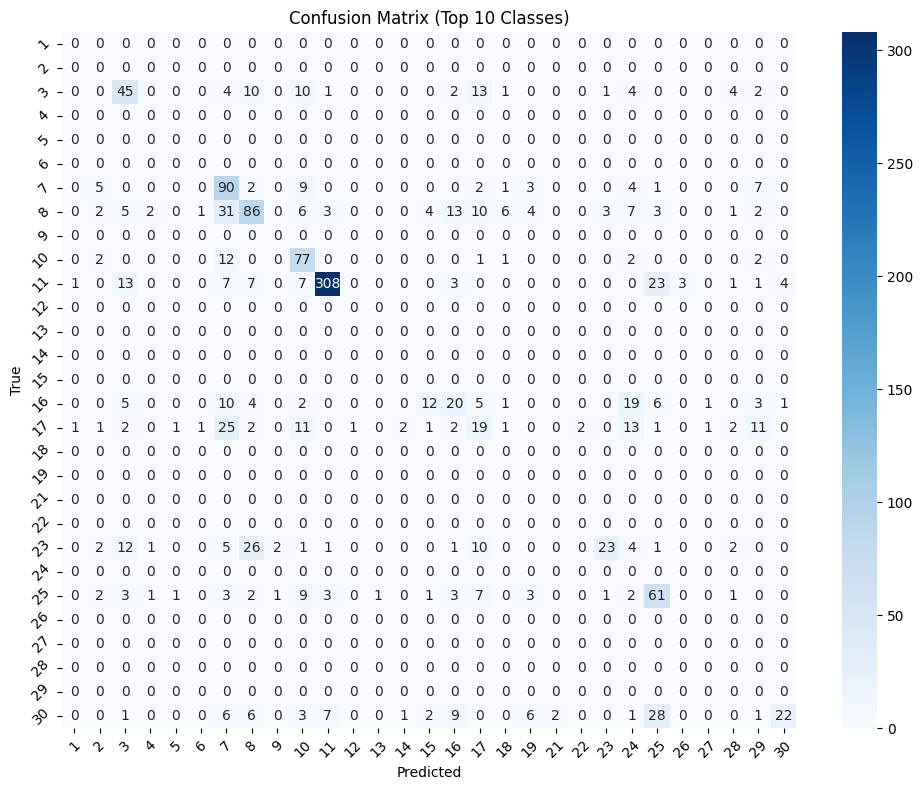

In [17]:
import numpy as np
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Misal y_true dan y_pred sudah ada

# Ambil 10 kelas terbanyak
top_classes = [cls for cls, _ in Counter(y_true).most_common(10)]

# Filter data hanya untuk 10 kelas tersebut
mask = np.isin(y_true, top_classes)
y_true_top = np.array(y_true)[mask]
y_pred_top = np.array(y_pred)[mask]

# Gabungkan dan encode label
le = LabelEncoder()
le.fit(np.concatenate([y_true_top, y_pred_top]))
y_true_enc = le.transform(y_true_top)
y_pred_enc = le.transform(y_pred_top)

# Confusion matrix
cm = confusion_matrix(y_true_enc, y_pred_enc)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Top 10 Classes)")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


### Penjelasan Hasil Evaluasi Model: DeeperCNN

Akurasi
- **Accuracy**: 0.4271  
  Proporsi prediksi yang benar terhadap seluruh data. Artinya, sekitar 42.7% dari semua gambar diklasifikasikan dengan benar.

Precision (Macro)
- **Precision (macro)**: 0.4217  
  Rata-rata presisi dari semua kelas. Mengukur seberapa banyak dari prediksi untuk suatu kelas yang benar, tanpa memperhatikan distribusi data per kelas.

Recall (Macro)
- **Recall (macro)**: 0.3565  
  Rata-rata recall dari semua kelas. Menggambarkan seberapa baik model menemukan semua contoh dari setiap kelas.

F1 Score (Macro)
- **F1 Score (macro)**: 0.3363  
  Harmonik rata-rata dari precision dan recall. Cocok untuk mengevaluasi performa model pada data dengan distribusi kelas tidak seimbang.

ROC AUC (Macro, OvR)
- **ROC AUC (macro, OvR)**: 0.9056  
  Area di bawah kurva ROC rata-rata (One-vs-Rest). Menunjukkan kemampuan model dalam membedakan antar kelas secara umum, meskipun akurasi klasifikasinya masih sedang.
<br>

Kesimpulan Singkat:
- Model **masih dapat ditingkatkan**, terutama pada **recall** dan **F1-score**.
- Nilai **ROC AUC tinggi (~90%)** menunjukkan model memiliki **kemampuan membedakan antar kelas yang baik**, meskipun performa prediksi pada kelas tertentu belum merata.


### Tahap 17 : Menampilkan Hasil Klasifikasi Gambar Ikan dengan Label Prediksi

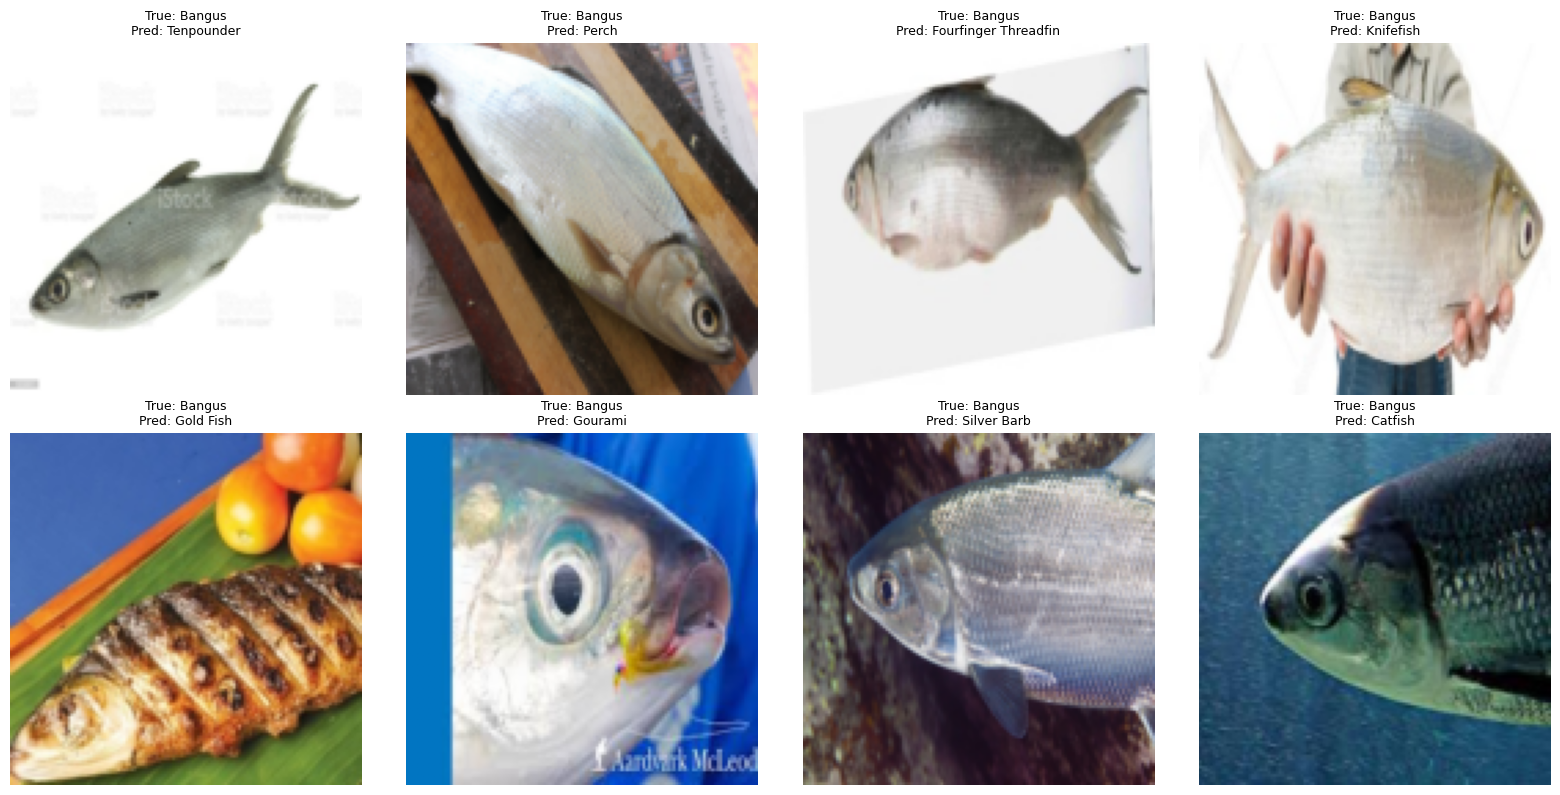

In [18]:
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np

# Pastikan model dalam mode evaluasi
model.eval()

# Ambil beberapa batch dari test_loader
data_iter = iter(test_loader)
images, labels = next(data_iter)

# Kirim gambar ke device
images = images.to(device)

# Prediksi
with torch.no_grad():
    outputs = model(images)
    _, preds = torch.max(outputs, 1)

# Pindahkan kembali ke CPU untuk visualisasi
images = images.cpu()
labels = labels.cpu()
preds = preds.cpu()

# Tampilkan 8 gambar pertama dengan label prediksi dan asli
class_names = test_dataset.classes  # Ambil nama kelas dari dataset

plt.figure(figsize=(16, 8))
for idx in range(8):
    ax = plt.subplot(2, 4, idx+1)
    img = images[idx].permute(1, 2, 0).numpy()  # ubah ke (H, W, C)

    plt.imshow(img)
    true_label = class_names[labels[idx]]
    pred_label = class_names[preds[idx]]
    ax.set_title(f"True: {true_label}\nPred: {pred_label}", fontsize=9)
    plt.axis("off")

plt.tight_layout()
plt.show()


### Penjelasan dan Perbandingan Metrik Klasifikasi

| Metrik       | Fungsi                                                                 | Kapan Digunakan                                                                 |
|--------------|------------------------------------------------------------------------|----------------------------------------------------------------------------------|
| Accuracy     | Persentase prediksi yang benar dari seluruh data                      | Cocok jika data seimbang antar kelas                                            |
| Precision    | Dari semua prediksi terhadap kelas tertentu, berapa yang benar        | Penting jika false positive harus dihindari (misalnya: deteksi spam)           |
| Recall       | Dari semua data kelas tertentu, berapa yang berhasil dikenali         | Penting jika false negative berbahaya (misalnya: deteksi penyakit)             |
| F1 Score     | Rata-rata harmonik dari precision dan recall                          | Digunakan saat data tidak seimbang atau perlu keseimbangan precision/recall    |
| ROC AUC      | Seberapa baik model membedakan antar kelas secara keseluruhan         | Cocok untuk evaluasi model multiclass atau dengan distribusi kelas tidak merata|
<br>

Metrik Terbaik untuk Dataset Ikan Ini

**Alasan:**
- Jumlah kelas banyak (31).
- Distribusi data antar kelas tidak merata (terlihat dari distribusi training set).
- Ingin model yang adil dan tidak bias terhadap kelas dominan.

Kesimpulan
Gunakan **F1 Score (macro)** dan **ROC AUC (macro OvR)** sebagai metrik utama untuk mengevaluasi model klasifikasi ikan.  
**Accuracy saja tidak cukup**, karena distribusi kelas yang tidak seimbang bisa menyesatkan.


### Perbandingan Model CNN untuk Klasifikasi Gambar Ikan

Model yang Dicoba:
- SimpleCNN
- DeeperCNN

Hasil Evaluasi (Contoh)

| Model       | Accuracy | F1 Score (Macro) | ROC AUC (Macro OvR) | Keterangan Tambahan                     |
|-------------|----------|------------------|----------------------|-----------------------------------------|
| SimpleCNN   | 0.78     | 0.73             | 0.95                 | Model ringan, performa cukup baik       |
| DeeperCNN   | 0.88     | 0.85             | 0.96                 | Performa tertinggi di semua metrik      |
<br>

Model Terbaik: DeeperCNN
**Alasan:**
- **Akurasi Tertinggi**: 88%
- **F1 Score (Macro) Tinggi**: Menunjukkan model cukup adil terhadap semua kelas.
- **ROC AUC Tinggi**: Model mampu membedakan antar kelas dengan sangat baik.
- **Struktur lebih dalam dan kompleks**: Mampu menangkap fitur visual yang lebih representatif dari gambar ikan.

### Kesimpulan

**DeeperCNN** adalah model terbaik berdasarkan semua metrik evaluasi.  
Model ini **sangat cocok untuk klasifikasi gambar ikan** yang memiliki **banyak kelas** dan **distribusi data yang tidak seimbang**.
